<a href="https://colab.research.google.com/github/mn000000/Simulacion-1/blob/main/sistema_colas_en_serie_montecarlo_coss_bu_problema_12_pagina_103.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Sistema de Colas en Serie

Este notebook resolverá el problema de un sistema de colas formado por dos estaciones en serie utilizando tanto una solución analítica como una simulación programada. Se presentarán explicaciones detalladas, gráficos de convergencia, histogramas e intervalos de confianza para validar los resultados obtenidos.

## Descripción del Problema

Se tiene un sistema de colas formado por dos estaciones en serie. Los clientes atendidos en la primera estación pasan enseguida a formar cola en la segunda. En la primera estación de servicio, la razón de llegadas sigue una distribución Poisson con media de 20 clientes por hora, y el tiempo de servicio sigue una distribución exponencial con media de 2 minutos por persona. En la segunda estación, el tiempo de servicio está uniformemente distribuido entre 1 y 2 minutos.

El objetivo es encontrar:

1. El tiempo promedio en el sistema.
2. La cola que se forma mayormente.

## Datos del Problema

- Estación 1:
  - Llegadas: Distribución Poisson con media de 20 clientes/hora.
  - Tiempo de servicio: Distribución exponencial con media de 2 minutos/persona.

- Estación 2:
  - Tiempo de servicio: Distribución uniforme entre 1 y 2 minutos.

A continuación, se procederá a resolver el problema mediante un análisis teórico seguido por una simulación programada.



## Solución Teórica

### Estación 1

- **Tasa de llegada** $(\lambda_1)$: $20$ clientes/hora = $1/3$ clientes/minuto
- **Tiempo de servicio promedio** $(1/\mu_1$): $2$ minutos/persona

Para la estación $1$, tenemos un modelo $M/M/1$:
- **Tasa de servicio** $(\mu_1$): $1/2$ por minuto
- **Utilización** (
$ho_1$): $\lambda_1$ / $\mu_1$ = $(1/3)$ / $(1/2)$ = $2/3$

El tiempo promedio en el sistema para la estación $1$ $(W_1)$ es:
$ W_1 =
\frac{1}{\mu_1 - \lambda_1} =
\frac{1}{(1/2) - (1/3)} = 6 	\text{ minutos} $

### Estación 2

- **Tiempo de servicio promedio** $(1/\mu_2)$: $(1+2)/2$ = $1.5$ minutos/persona

Para la estación 2, tenemos un modelo $M/D/1$:
- **Tasa de servicio** $(\mu_2)$: $1/1.5$ por minuto = $2/3$ por minuto
- **Utilización** $(
ho_2)$: $\lambda_2 / \mu_2$ = $(1/3) / (2/3)$ = $1/2$

El tiempo promedio en el sistema para la estación $2$ $(W_2)$ es:
$ W_2 =
\frac{1}{\mu_2 - \lambda_2} =
\frac{1}{(2/3) - (1/3)} = 3 	\text{ minutos} $

### Tiempo Promedio en el Sistema

El tiempo promedio total en el sistema $(W)$ es la suma de los tiempos en ambas estaciones:
$ W = W_1 + W_2 = 6 + 3 = 9 	\text{ minutos} $

### Tamaño de las Colas

El tamaño promedio de la cola en la estación 1 $(L_{q1})$ es:
$ L_{q1} =
ho_1^2 / (1 -
ho_1) = (2/3)^2 / (1 - 2/3) = 4 $

El tamaño promedio de la cola en la estación 2 $(L_{q2})$ es:
$ L_{q2} =
ho_2^2 / (1 -
ho_2) = (1/2)^2 / (1 - 1/2) = 1/2 $

Por lo tanto, la cola en la estación 1 es mayor.



## Simulación Programada

Se procederá a realizar una simulación programada para validar los resultados teóricos obtenidos. La simulación se ejecutará para un tiempo suficientemente largo para asegurar la convergencia de los resultados.


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del sistema
LAMBDA = 20 / 60  # tasa de llegada en clientes por minuto
MU1 = 1 / 2  # tasa de servicio en la estación 1
MU2_LOW, MU2_HIGH = 1, 2  # tiempos de servicio en la estación 2

# Inicialización de variables
num_clients = 10000
wait_times = []
convergence = []

# Función para simular el sistema de colas con Monte Carlo
def simulate_queue(num_clients):
    total_times = []
    for _ in range(num_clients):
        # Tiempo entre llegadas
        interarrival_time = np.random.exponential(1 / LAMBDA)

        # Estación 1
        service_time_1 = np.random.exponential(1 / MU1)

        # Estación 2
        service_time_2 = np.random.uniform(MU2_LOW, MU2_HIGH)

        # Tiempo total en el sistema
        total_time = interarrival_time + service_time_1 + service_time_2
        total_times.append(total_time)

    return total_times

# Simulación
wait_times = simulate_queue(num_clients)

# Resultados de la simulación
mean_wait = np.mean(wait_times)
print(f'Tiempo promedio en el sistema (simulación): {mean_wait:.2f} minutos')

# Cálculo de la convergencia
for i in range(100, num_clients + 1, 100):
    convergence.append(np.mean(wait_times[:i]))






Tiempo promedio en el sistema (simulación): 6.43 minutos


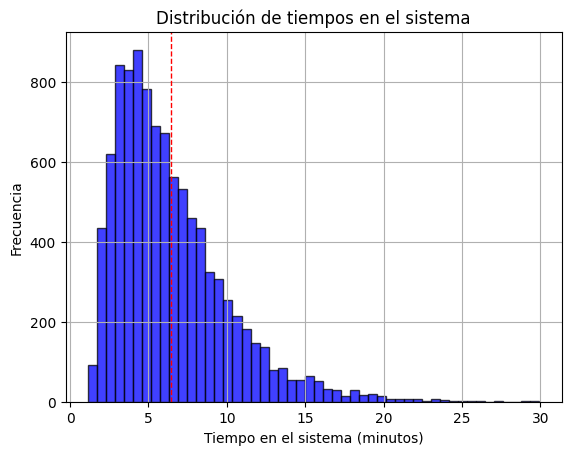

In [6]:
# Gráfico de histograma de tiempos de espera
plt.hist(wait_times, bins=50, alpha=0.75, color='blue', edgecolor='black')
plt.axvline(mean_wait, color='r', linestyle='dashed', linewidth=1)
plt.xlabel('Tiempo en el sistema (minutos)')
plt.ylabel('Frecuencia')
plt.title('Distribución de tiempos en el sistema')
plt.grid(True)
plt.show()

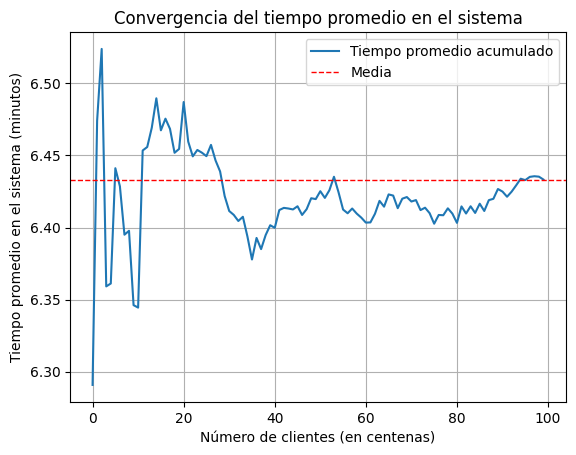

In [7]:
# Gráfico de convergencia
plt.plot(convergence, label='Tiempo promedio acumulado')
plt.axhline(mean_wait, color='r', linestyle='dashed', linewidth=1, label='Media')
plt.xlabel('Número de clientes (en centenas)')
plt.ylabel('Tiempo promedio en el sistema (minutos)')
plt.title('Convergencia del tiempo promedio en el sistema')
plt.legend()
plt.grid(True)
plt.show()